In [2]:
!pip install matplotlib

  Using cached matplotlib-3.6.0-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached Pillow-9.2.0-cp39-cp39-macosx_11_0_arm64.whl (2.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 kB 7.0 MB/s eta 0:00:0000:0100:01
  Using cached contourpy-1.0.5-cp39-cp39-macosx_11_0_arm64.whl (226 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from airsenal.scripts.replay_season import rerun_predictions
from airsenal.framework.prediction_utils import get_player_scores
from airsenal.framework.utils import session
from airsenal.framework.schema import Fixture, PlayerScore, Player, PlayerPrediction

ImportError: cannot import name 'rerun_predictions' from 'airsenal.scripts.replay_season' (/Users/nbarlow/miniforge3/envs/airsenalenv/lib/python3.9/site-packages/airsenal/scripts/replay_season.py)

## Generate Predictions (slow!)

In [8]:
season = "2021"
gw_start = 4
gw_end = 4

weeks_ahead = 9 
num_thread = 1

Run outside this notebook:
```
rerun_predictions(
    season=season,
    gw_start=gw_start,
    gw_end=gw_end,
    weeks_ahead=weeks_ahead, 
    num_thread=num_thread,
)
```

## Get Players from Database

In [9]:
players = pd.read_sql(session.query(Player).statement, session.bind)
players.set_index("player_id", inplace=True)
players = players["name"]
players.head()

player_id
1                    Mesut Özil
2     Sokratis Papastathopoulos
3    David Luiz Moreira Marinho
4     Pierre-Emerick Aubameyang
5                 Cédric Soares
Name: name, dtype: object

## Get Predictions from the Database

In [10]:
gw = 4

In [11]:
preds = pd.read_sql(session.query(PlayerPrediction).statement, session.bind)

tags = preds["tag"].unique().astype(str)
tags

array(['655335dc-2e34-46b5-a068-92bd5eb2b772',
       '2021_5_3254e096-fbf4-4239-a5a9-c88e311d4e63',
       '2021_6_08d61018-a892-44b4-87dd-f40228396e70',
       '2021_7_cb7e3e71-45ae-45ad-bc2e-a0fbae33875a',
       '2021_8_f1772fa2-3fd7-41d2-a85b-168018040625',
       '2021_9_272114e3-a989-45c6-baa2-35ef78429c8c',
       '2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31'], dtype='<U43')

In [12]:
gw_tag = tags[np.char.startswith(tags, f"{season}_{gw}_")][0]

gw_preds = preds[preds["tag"] == gw_tag]
gw_preds.head()

,id,fixture_id,predicted_points,tag,player_id
11886,11887,1181,4.113708,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31,317
11887,11888,1182,3.761504,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31,317
11888,11889,1196,4.609765,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31,317
11889,11890,1205,4.103372,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31,317
11890,11891,1220,2.536095,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31,317


In [13]:
tags

array(['655335dc-2e34-46b5-a068-92bd5eb2b772',
       '2021_5_3254e096-fbf4-4239-a5a9-c88e311d4e63',
       '2021_6_08d61018-a892-44b4-87dd-f40228396e70',
       '2021_7_cb7e3e71-45ae-45ad-bc2e-a0fbae33875a',
       '2021_8_f1772fa2-3fd7-41d2-a85b-168018040625',
       '2021_9_272114e3-a989-45c6-baa2-35ef78429c8c',
       '2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31'], dtype='<U43')

## Get Actual Scores from the Database

In [14]:
query = (
    session.query(PlayerScore, Fixture.season, Fixture.gameweek)
    .filter(Fixture.gameweek >= gw)
    .filter(Fixture.gameweek < gw + weeks_ahead)
    .filter(Fixture.season == season)
    .join(Fixture)
)
scores = pd.read_sql(query.statement, session.bind)
scores.set_index("id", inplace=True, drop=True)
scores = scores.merge(players, left_on="player_id", right_index=True)

scores.head()

,player_team,opponent,points,goals,assists,bonus,conceded,minutes,player_id,result_id,...,red_cards,saves,bps,influence,creativity,threat,ict_index,season,gameweek,name
id,,,,,,,,,,,,,,,,,,,,,
66725,ARS,SHU,0,0,0,0,0,0,1,1175,...,0,0,0,0.0,0.0,0.0,0.0,2021,4,Mesut Özil
66726,ARS,MCI,0,0,0,0,0,0,1,1181,...,0,0,0,0.0,0.0,0.0,0.0,2021,5,Mesut Özil
66727,ARS,LEI,0,0,0,0,0,0,1,1196,...,0,0,0,0.0,0.0,0.0,0.0,2021,6,Mesut Özil
66728,ARS,MUN,0,0,0,0,0,0,1,1205,...,0,0,0,0.0,0.0,0.0,0.0,2021,7,Mesut Özil
66729,ARS,AVL,0,0,0,0,0,0,1,1218,...,0,0,0,0.0,0.0,0.0,0.0,2021,8,Mesut Özil


In [15]:
scores[["name", "points"]].sort_values(by="points", ascending=False).head()

,name,points
id,,
67214,Jack Grealish,24
70606,Riyad Mahrez,21
67395,Ollie Watkins,19
69036,James Rodríguez,18
72251,Heung-Min Son,18


In [16]:
scores = scores.merge(
    gw_preds,
    left_on=["player_id", "fixture_id"],
    right_on=["player_id", "fixture_id"]
)

scores.head()

,player_team,opponent,points,goals,assists,bonus,conceded,minutes,player_id,result_id,...,influence,creativity,threat,ict_index,season,gameweek,name,id,predicted_points,tag
0,ARS,SHU,0,0,0,0,0,0,1,1175,...,0.0,0.0,0.0,0.0,2021,4,Mesut Özil,13282,0.0,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31
1,ARS,MCI,0,0,0,0,0,0,1,1181,...,0.0,0.0,0.0,0.0,2021,5,Mesut Özil,13283,0.0,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31
2,ARS,LEI,0,0,0,0,0,0,1,1196,...,0.0,0.0,0.0,0.0,2021,6,Mesut Özil,13284,0.0,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31
3,ARS,MUN,0,0,0,0,0,0,1,1205,...,0.0,0.0,0.0,0.0,2021,7,Mesut Özil,13285,0.0,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31
4,ARS,AVL,0,0,0,0,0,0,1,1218,...,0.0,0.0,0.0,0.0,2021,8,Mesut Özil,13286,0.0,2021_4_e3fb1857-9eb6-4e3d-9628-095e9dc9bd31


Text(0.5, 1.0, '2021 GW 4 - GW 12')

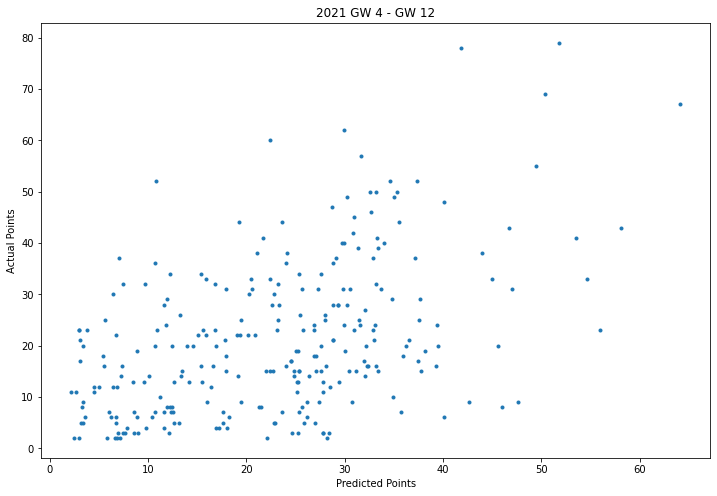

In [17]:
sum_pts = scores.groupby("name")[["points", "predicted_points"]].sum()

mask = (sum_pts["points"] > 1) & (sum_pts["predicted_points"] > 1)

plt.figure(figsize=(12, 8))
plt.plot(sum_pts[mask]["predicted_points"], sum_pts[mask]["points"], ".")
plt.xlabel("Predicted Points")
plt.ylabel("Actual Points")
plt.title(f"{season} GW {gw} - GW {gw+weeks_ahead-1}")

In [18]:
sum_pts.corr()

,points,predicted_points
points,1.000000,0.609705
predicted_points,0.609705,1.000000


In [20]:
sum_pts[mask].sort_values(by="points",  ascending=False).head(30)

,points,predicted_points
name,,
Harry Kane,79,51.757249
Heung-Min Son,78,41.799448
Bruno Miguel Borges Fernandes,69,50.329938
Mohamed Salah,67,64.106293
Jack Grealish,62,29.925376
Kurt Zouma,60,22.363542
James Ward-Prowse,57,31.714941
Jamie Vardy,55,49.436771
Che Adams,52,34.611957
